# First attempt at analyzing the Titanic Dataset

#### First we will attempt to pull the data into our python program using Pandas

#### Then we will try to condition the data

####  Then we will perform functions such as averages and find groups

####  We will create visualizations to see what the data looks like

####  A side project after will involve begining to make predictions from the data

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.DataFrame(columns = ['col1', 'col2', 'col3'])
df.tail()

,col1,col2,col3


In [3]:
df_raw = pd.read_csv('.\\data\\gender_submission.csv')
df_raw.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
df_raw_test = pd.read_csv('.\\data\\test.csv')
df_raw_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_merged = df_raw.merge(df_raw_test, how = 'left', on = 'PassengerId')
df_merged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Functions in pandas that can look at groups of data include

#### Groupby function

#### Filtering (Use google search, but ultimately it will by using boolean functions to select only certain data points)

In [6]:
df_survived = df_merged[df_merged['Survived'] == 1]
df_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S


In [7]:
df_merged.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df_survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,152.000000,152.0,152.000000,127.000000,152.000000,152.000000,152.000000
mean,1096.789474,1.0,2.144737,30.272362,0.565789,0.598684,49.747699
std,123.345508,0.0,0.887051,15.428613,0.974313,1.105434,73.108716
min,893.000000,1.0,1.000000,0.170000,0.000000,0.000000,6.950000
25%,989.500000,1.0,1.000000,20.500000,0.000000,0.000000,8.626050
50%,1093.500000,1.0,2.000000,27.000000,0.000000,0.000000,21.512500
75%,1205.250000,1.0,3.000000,38.500000,1.000000,1.000000,55.441700
max,1306.000000,1.0,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
len(df_survived.index)/len(df_merged.index)*100

36.36363636363637

# Making Graphs and Visualizations

#### Plots of X and Y

#### Histograms (bar charts with bins over a single variable)

#### Scatterplots with Points

#### Regular bar graphs with single variable or multiple compared along same Y axis

#### Run charts which is time series data (Stock prices, also Manufacturing data)
###### SPC Statistical Process Control (Has Data over time alongside Range or moving average or other stats/transformations)

#### Heat Maps for Correlations (Seaborn makes this really easy and is similar to matplotlib)

#### 3D Plots for visualizing multidimensional distributions/relationships

In [15]:
[df_survived['Age'], df_survived['Fare']]

[1      47.0
 4      22.0
 6      30.0
 8      18.0
 12     23.0
        ... 
 409     3.0
 410     NaN
 411    37.0
 412    28.0
 414    39.0
 Name: Age, Length: 152, dtype: float64,
 1        7.0000
 4       12.2875
 6        7.6292
 8        7.2292
 12      82.2667
          ...   
 409     13.7750
 410      7.7500
 411     90.0000
 412      7.7750
 414    108.9000
 Name: Fare, Length: 152, dtype: float64]

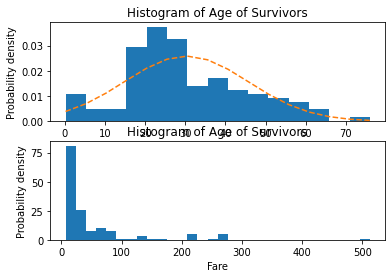

In [55]:
#plt.hist(df_survived['Age'], density = False)

x = df_survived['Age'].dropna()

mu = df_survived['Age'].dropna().mean()

sigma = df_survived['Age'].dropna().std()

x1 = df_survived['Fare'].dropna()

mu1 = df_survived['Fare'].dropna().mean()

sigma1 = df_survived['Fare'].dropna().std()

num_bins = 15

num_bins1 = 30

fig, axs = plt.subplots(2)

# the histogram of the data
n, bins, patches = axs[0].hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
axs[0].plot(bins, y, '--')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability density')
axs[0].set_title(r'Histogram of Age of Survivors')

# the histogram of the data
n, bins1, patches = axs[1].hist(x1, num_bins1, density=False)

# add a 'best fit' line
y1 = ((1 / (np.sqrt(2 * np.pi) * sigma1)) *
     np.exp(-0.5 * (1 / sigma1 * (bins - mu1))**2))
#axs[1].plot(bins1, y1, '--')
axs[1].set_xlabel('Fare')
axs[1].set_ylabel('Probability density')
axs[1].set_title(r'Histogram of Age of Survivors')

plt.show()